<a href="https://colab.research.google.com/github/seyoung0218/AIFFEL-Datathon/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

original = pd.read_csv('/content/drive/MyDrive/데이터톤/Stores.csv')
data = original.copy()

In [4]:
data['item_per_area'] = data['Items_Available']/data['Store_Area']
data['customer_per_area'] = data['Daily_Customer_Count']/ data['Store_Area']
data['customer_per_item'] = data['Daily_Customer_Count']/data['Items_Available']

In [5]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,customer_per_item
0,1,1659,1961,530,66490,1.182037,0.319470,0.270270
1,2,1461,1752,210,39820,1.199179,0.143737,0.119863
2,3,1340,1609,720,54010,1.200746,0.537313,0.447483
3,4,1451,1748,620,53730,1.204686,0.427292,0.354691
4,5,1770,2111,450,46620,1.192655,0.254237,0.213169
...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,1.207332,0.682680,0.565445
892,893,1387,1663,850,82080,1.198991,0.612833,0.511124
893,894,1200,1436,1060,76440,1.196667,0.883333,0.738162
894,895,1299,1560,770,96610,1.200924,0.592764,0.493590


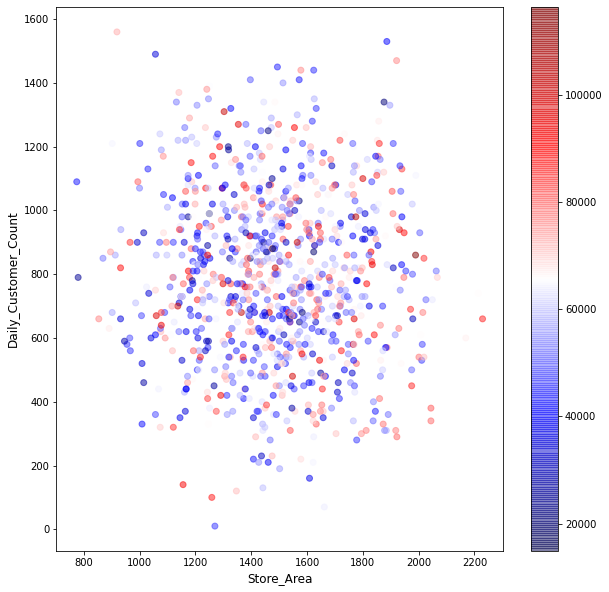

In [6]:
plt.figure(figsize=(10,10))

plt.scatter(data['Store_Area'],
            data['Daily_Customer_Count'],
            c = data['Store_Sales'],
            cmap = 'seismic',
            alpha = 0.5)
plt.colorbar()
plt.xlabel('Store_Area', size = 12)
plt.ylabel('Daily_Customer_Count', size = 12)
plt.show()

In [9]:
Sorted_df = data.sort_values(by = 'Store_Area')
data['Area_Class'] = pd.qcut(Sorted_df['Store_Area'],labels = [9, 8, 7, 6, 5, 4, 3, 2, 1], q=9)

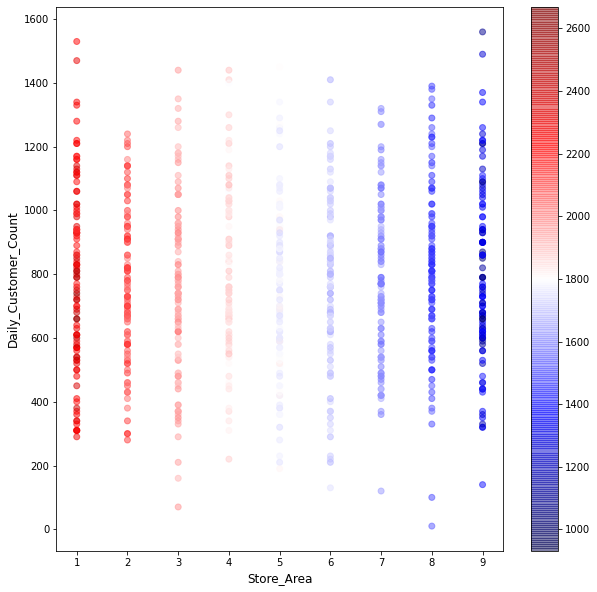

In [12]:
plt.figure(figsize=(10,10))

plt.scatter(data['Area_Class'],
            data['Daily_Customer_Count'],
            c = data['Items_Available'],
            cmap = 'seismic',
            alpha = 0.5)
plt.colorbar()
plt.xlabel('Store_Area', size = 12)
plt.ylabel('Daily_Customer_Count', size = 12)
plt.show()

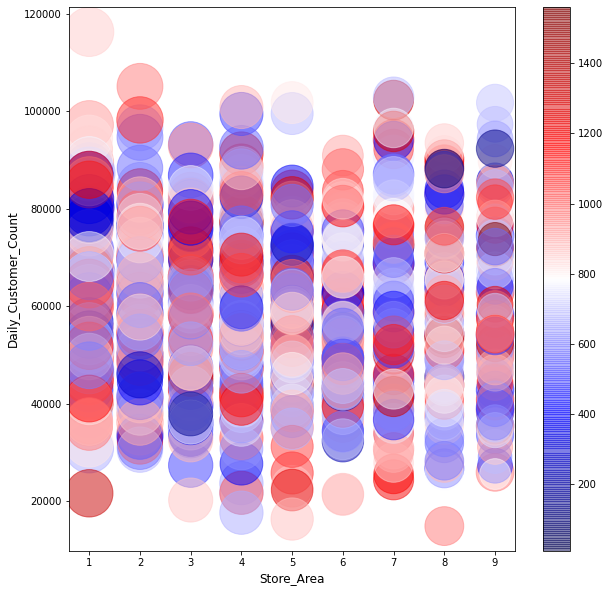

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data['Area_Class'],
            data['Store_Sales'],
            c = data['Daily_Customer_Count'],
            s = data['Items_Available'],
            cmap = 'seismic',
            alpha = 0.5)
plt.colorbar()
plt.xlabel('Store_Area', size = 12)
plt.ylabel('Daily_Customer_Count', size = 12)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [19]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,customer_per_item,Area_Class
0,1,1659,1961,530,66490,1.182037,0.319470,0.270270,3
1,2,1461,1752,210,39820,1.199179,0.143737,0.119863,5
2,3,1340,1609,720,54010,1.200746,0.537313,0.447483,7
3,4,1451,1748,620,53730,1.204686,0.427292,0.354691,5
4,5,1770,2111,450,46620,1.192655,0.254237,0.213169,2
...,...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,1.207332,0.682680,0.565445,4
892,893,1387,1663,850,82080,1.198991,0.612833,0.511124,6
893,894,1200,1436,1060,76440,1.196667,0.883333,0.738162,8
894,895,1299,1560,770,96610,1.200924,0.592764,0.493590,7


In [18]:
data_scaled.shape

(896, 9)

In [38]:
data.loc[:,'Store ID '] = data_scaled[:,0]

In [39]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,customer_per_item,Area_Class
0,-1.730119,1659,1961,530,66490,1.182037,0.319470,0.270270,3
1,-1.726253,1461,1752,210,39820,1.199179,0.143737,0.119863,5
2,-1.722386,1340,1609,720,54010,1.200746,0.537313,0.447483,7
3,-1.718520,1451,1748,620,53730,1.204686,0.427292,0.354691,5
4,-1.714654,1770,2111,450,46620,1.192655,0.254237,0.213169,2
...,...,...,...,...,...,...,...,...,...
891,1.714654,1582,1910,1080,66390,1.207332,0.682680,0.565445,4
892,1.718520,1387,1663,850,82080,1.198991,0.612833,0.511124,6
893,1.722386,1200,1436,1060,76440,1.196667,0.883333,0.738162,8
894,1.726253,1299,1560,770,96610,1.200924,0.592764,0.493590,7


In [40]:
columns = ['ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales', 'item_per_area', 'customer_per_area', 'customer_per_item']

In [41]:
for i in range(1,8):
  data.loc[:,columns[i]] = data_scaled[:,i]

data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,customer_per_item,Area_Class
0,-1.730119,0.694091,0.597135,-0.966481,0.415496,-1.886795,-1.051319,-1.030140,3
1,-1.726253,-0.097600,-0.100218,-2.172930,-1.136787,-0.063931,-1.862901,-1.864516,5
2,-1.722386,-0.581412,-0.577354,-0.250151,-0.310882,0.102776,-0.045254,-0.047063,7
3,-1.718520,-0.137585,-0.113564,-0.627167,-0.327179,0.521786,-0.553367,-0.561820,5
4,-1.714654,1.137919,1.097628,-1.268093,-0.741004,-0.757639,-1.352580,-1.346905,2
...,...,...,...,...,...,...,...,...,...
891,1.714654,0.386211,0.426968,1.107104,0.409675,0.803179,0.626091,0.607326,4
892,1.718520,-0.393485,-0.397177,0.239969,1.322886,-0.083925,0.303519,0.305985,6
893,1.722386,-1.141194,-1.154589,1.031701,0.994619,-0.331063,1.552764,1.565461,8
894,1.726253,-0.745348,-0.740848,-0.061644,2.168580,0.121654,0.210831,0.208713,7


In [93]:
data['Items_Available+3'] = [(a+2)*200 for a in data['Items_Available']]

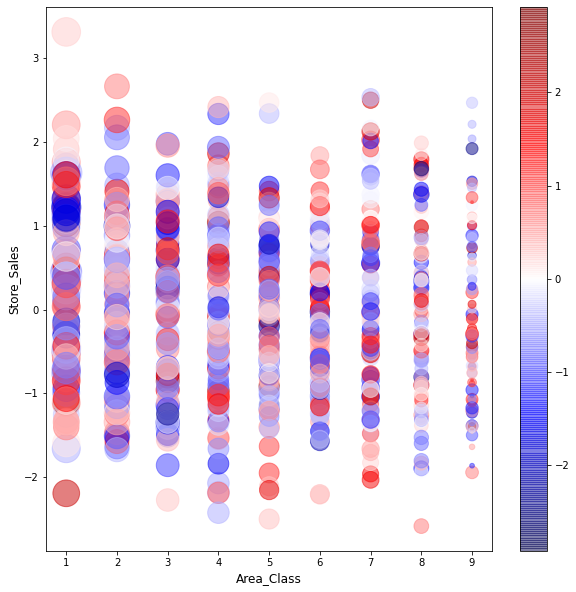

In [94]:
plt.figure(figsize=(10,10))
plt.scatter(data['Area_Class'],
            data['Store_Sales'],
            c = data['Daily_Customer_Count'],
            s = data['Items_Available+3'],
            cmap = 'seismic',
            alpha = 0.5,
            marker='o')
plt.colorbar()
plt.xlabel('Area_Class', size = 12)
plt.ylabel('Store_Sales', size = 12)
plt.show()

In [90]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,item_per_area,customer_per_area,customer_per_item,Area_Class,Items_Available*2,Items_Available*10,Items_Available+3
0,-1.730119,0.694091,0.597135,-0.966481,0.415496,-1.886795,-1.051319,-1.030140,3,0.356571,5.971355,129.856773
1,-1.726253,-0.097600,-0.100218,-2.172930,-1.136787,-0.063931,-1.862901,-1.864516,5,0.010044,-1.002177,94.989115
2,-1.722386,-0.581412,-0.577354,-0.250151,-0.310882,0.102776,-0.045254,-0.047063,7,0.333338,-5.773541,71.132296
3,-1.718520,-0.137585,-0.113564,-0.627167,-0.327179,0.521786,-0.553367,-0.561820,5,0.012897,-1.135642,94.321791
4,-1.714654,1.137919,1.097628,-1.268093,-0.741004,-0.757639,-1.352580,-1.346905,2,1.204788,10.976282,154.881409
...,...,...,...,...,...,...,...,...,...,...,...,...
891,1.714654,0.386211,0.426968,1.107104,0.409675,0.803179,0.626091,0.607326,4,0.182302,4.269679,121.348397
892,1.718520,-0.393485,-0.397177,0.239969,1.322886,-0.083925,0.303519,0.305985,6,0.157749,-3.971767,80.141164
893,1.722386,-1.141194,-1.154589,1.031701,0.994619,-0.331063,1.552764,1.565461,8,1.333076,-11.545890,42.270549
894,1.726253,-0.745348,-0.740848,-0.061644,2.168580,0.121654,0.210831,0.208713,7,0.548856,-7.408484,62.957581


# 이상치 제거

In [119]:
original = pd.read_csv('/content/drive/MyDrive/데이터톤/Stores.csv')
data = original.copy()
data['item_per_area'] = data['Items_Available']/data['Store_Area']
data['customer_per_area'] = data['Daily_Customer_Count']/ data['Store_Area']
data['customer_per_item'] = data['Daily_Customer_Count']/data['Items_Available']
data.drop('Store ID ', axis=1, inplace=True)

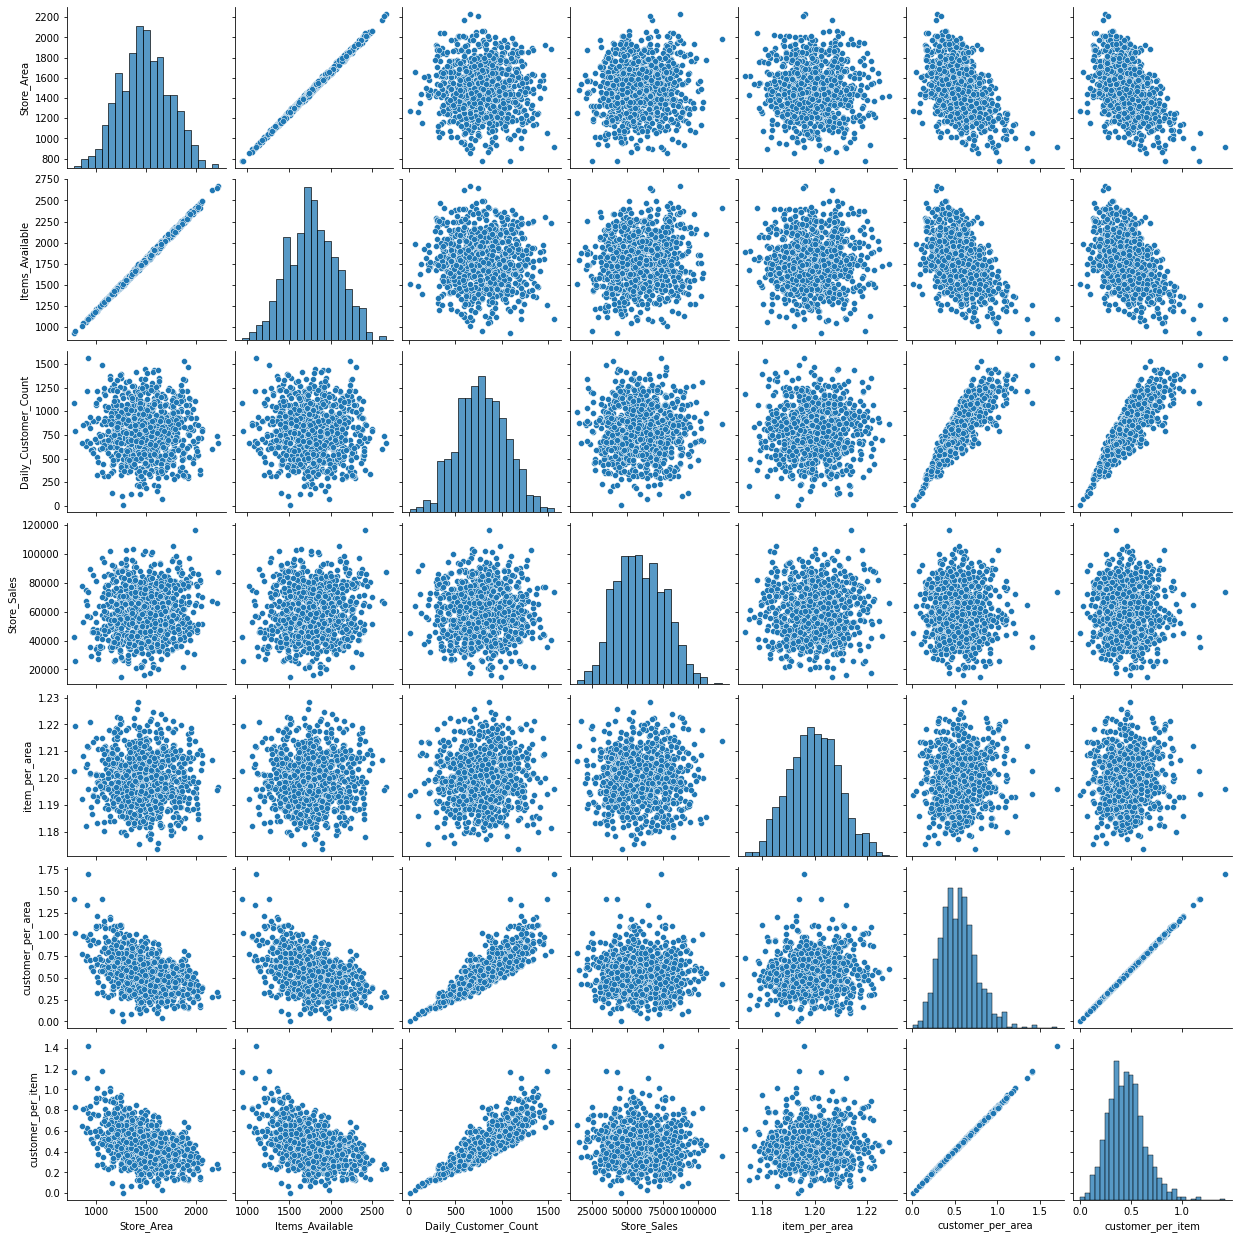

In [120]:
sns.pairplot(data)

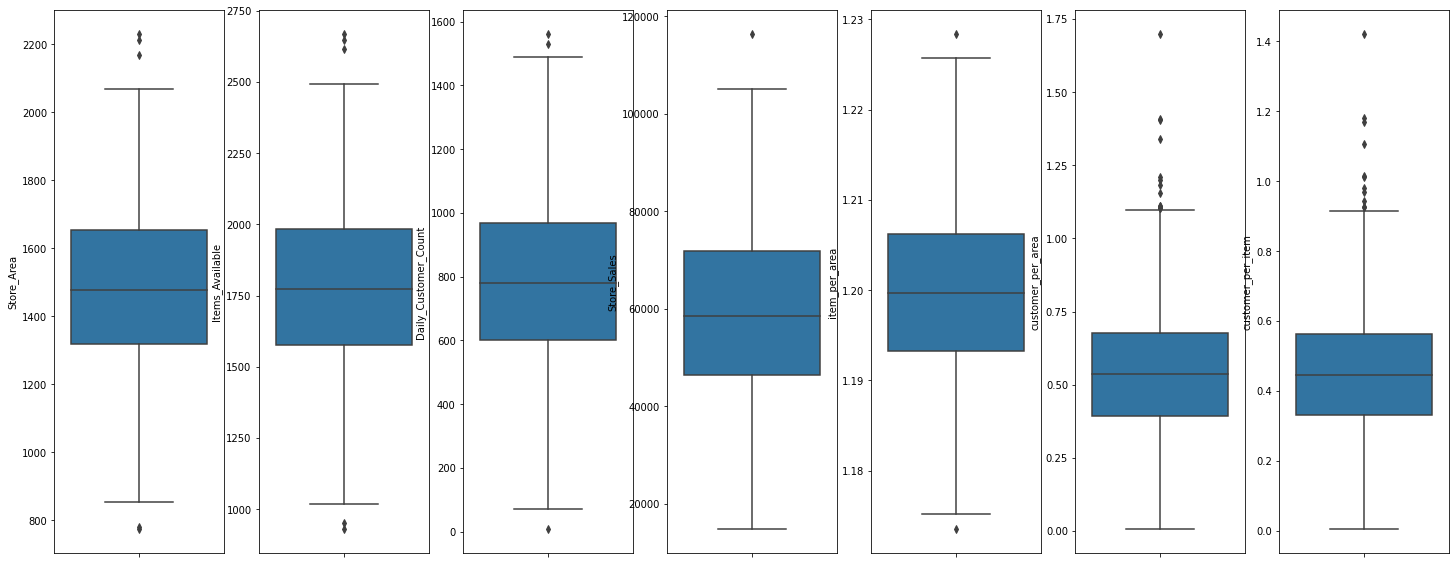

In [122]:
fig , ax = plt.subplots(1,7)
fig.set_size_inches(25,10)
sns.boxplot(y = 'Store_Area', data = data, ax=ax[0])
sns.boxplot(y = 'Items_Available', data = data, ax=ax[1])
sns.boxplot(y = 'Daily_Customer_Count', data = data, ax=ax[2])
sns.boxplot(y = 'Store_Sales', data = data, ax=ax[3])
sns.boxplot(y = 'item_per_area', data = data, ax=ax[4])
sns.boxplot(y = 'customer_per_area', data = data, ax=ax[5])
sns.boxplot(y = 'customer_per_item', data = data, ax=ax[6])

In [123]:
columns = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales', 'item_per_area', 'customer_per_area', 'customer_per_item']

for i in columns:

  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  under = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  data[i][under > data[i]] = under
  data[i][upper < data[i]] = upper

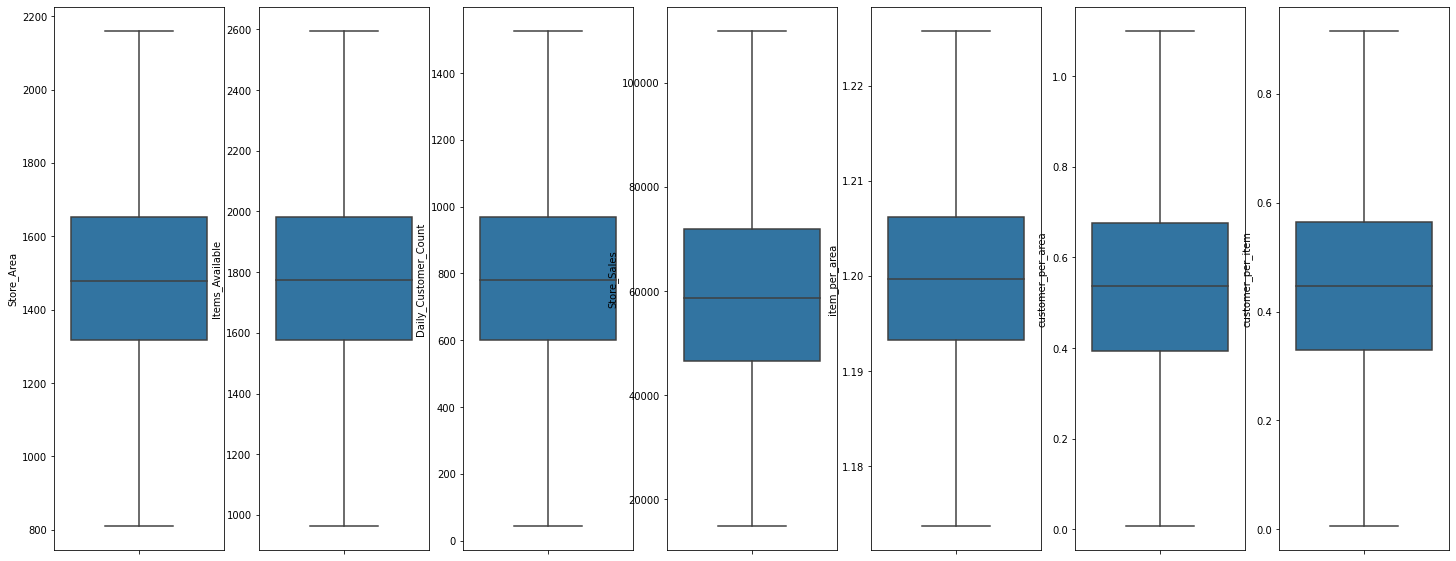

In [124]:
fig , ax = plt.subplots(1,7)
fig.set_size_inches(25,10)
sns.boxplot(y = 'Store_Area', data = data, ax=ax[0])
sns.boxplot(y = 'Items_Available', data = data, ax=ax[1])
sns.boxplot(y = 'Daily_Customer_Count', data = data, ax=ax[2])
sns.boxplot(y = 'Store_Sales', data = data, ax=ax[3])
sns.boxplot(y = 'item_per_area', data = data, ax=ax[4])
sns.boxplot(y = 'customer_per_area', data = data, ax=ax[5])
sns.boxplot(y = 'customer_per_item', data = data, ax=ax[6])

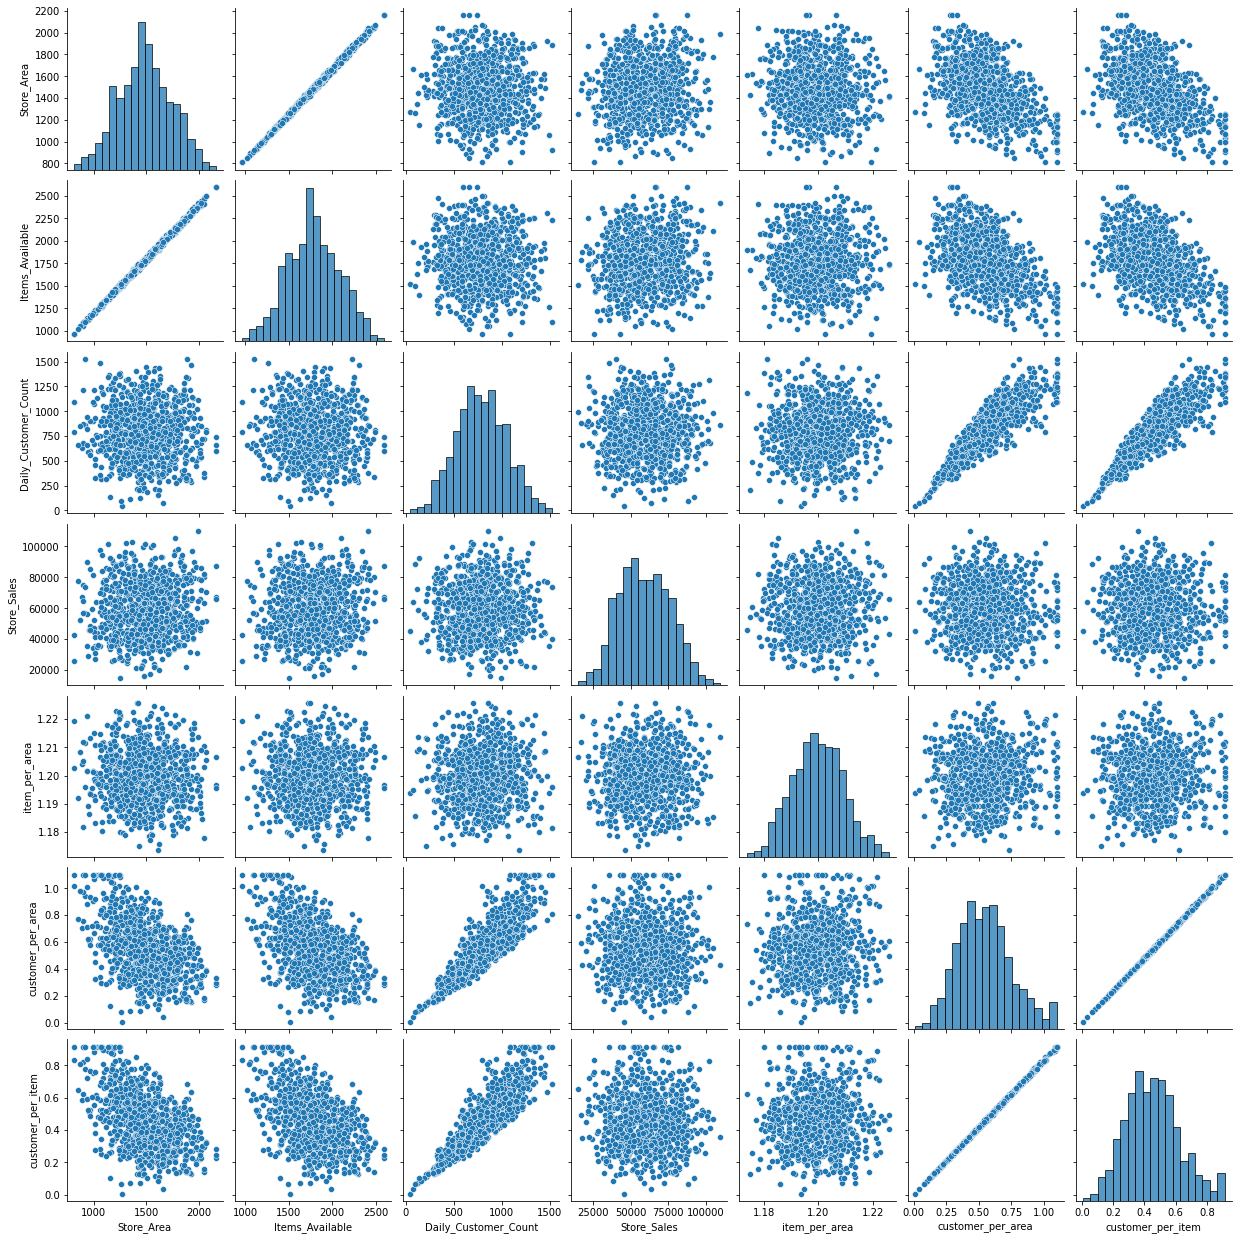

In [125]:
sns.pairplot(data)